In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm  
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats 
from plotly.graph_objects import Figure

In [2]:
df=pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


Column Name: age
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


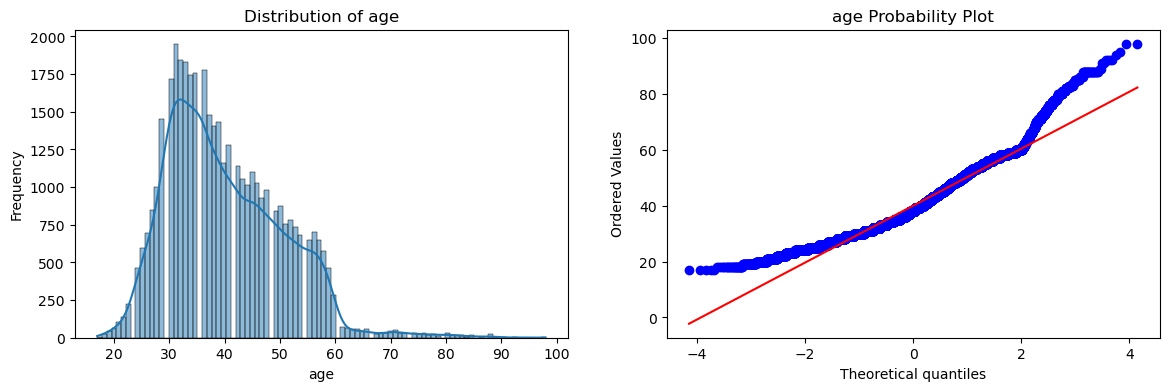


Column Name: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column Name: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column Name: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Column Name: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Column Name: housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Column Name: loan
loan
no         33950
y

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


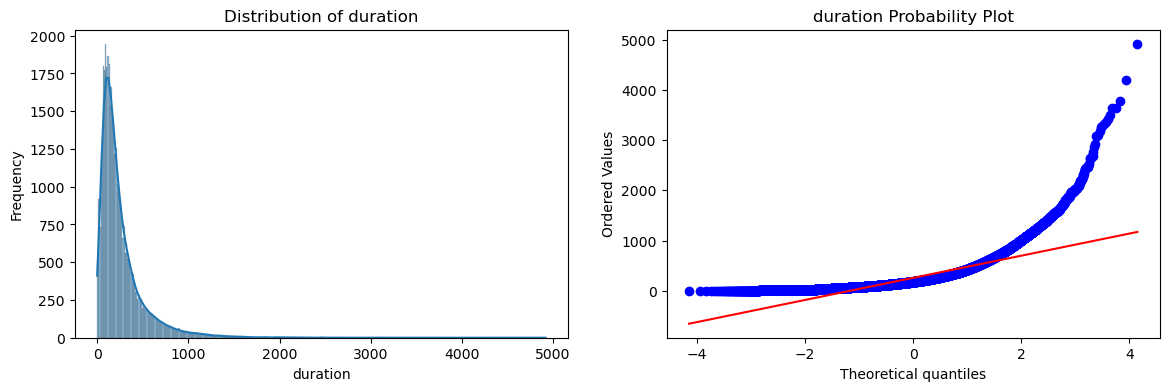


Column Name: campaign
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


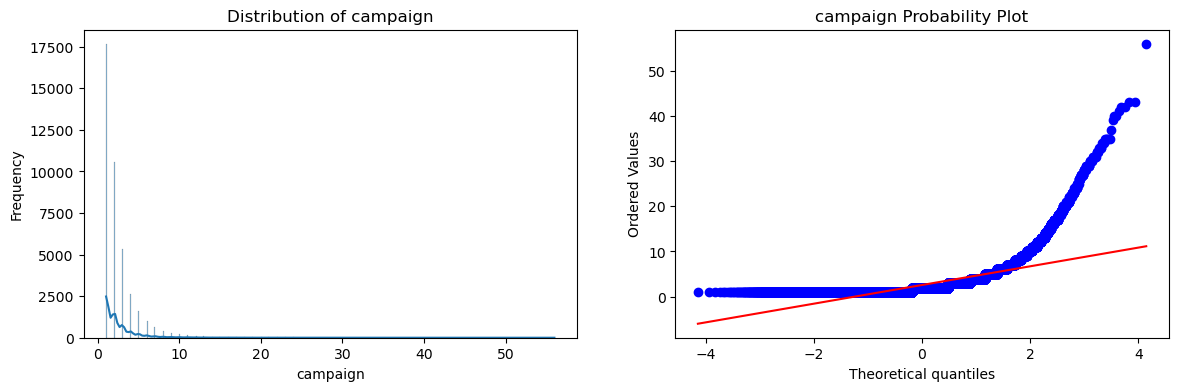


Column Name: pdays
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


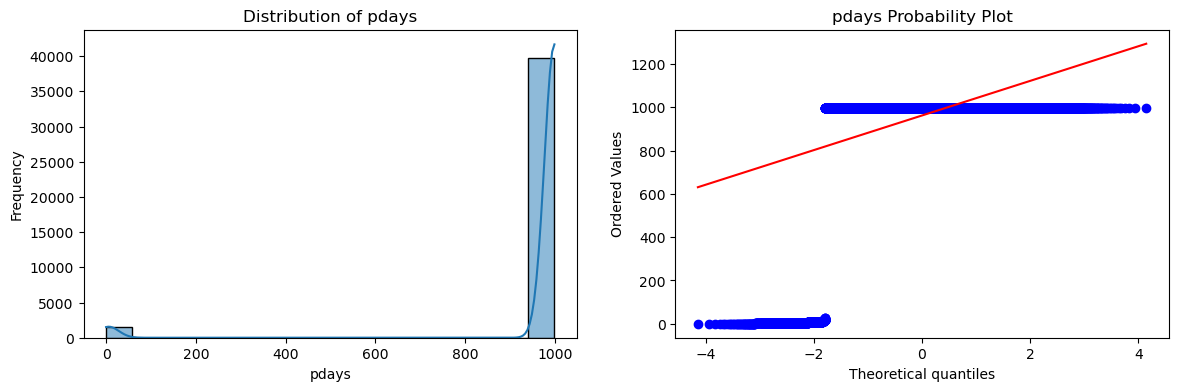


Column Name: previous
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


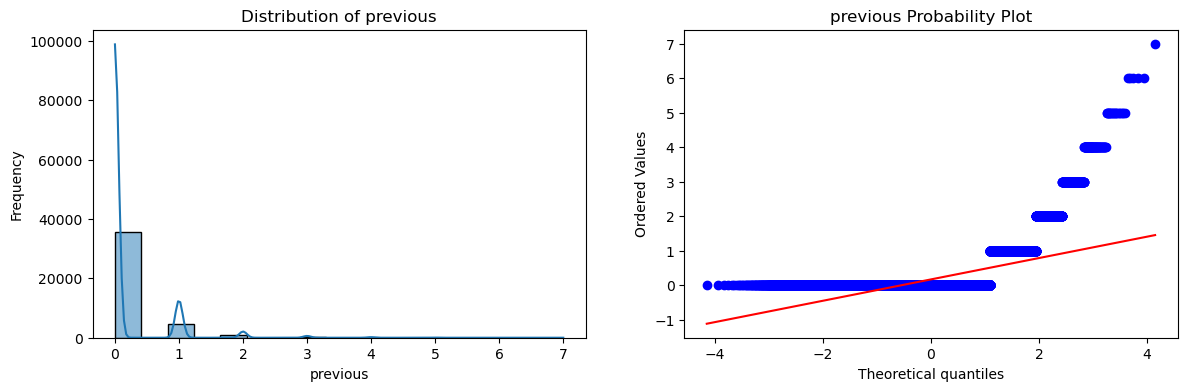


Column Name: poutcome
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Column Name: emp.var.rate
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


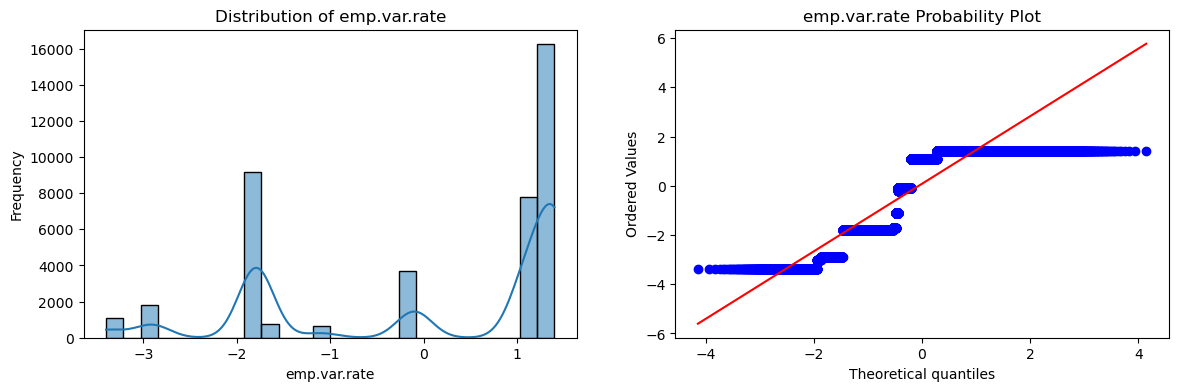


Column Name: cons.price.idx
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


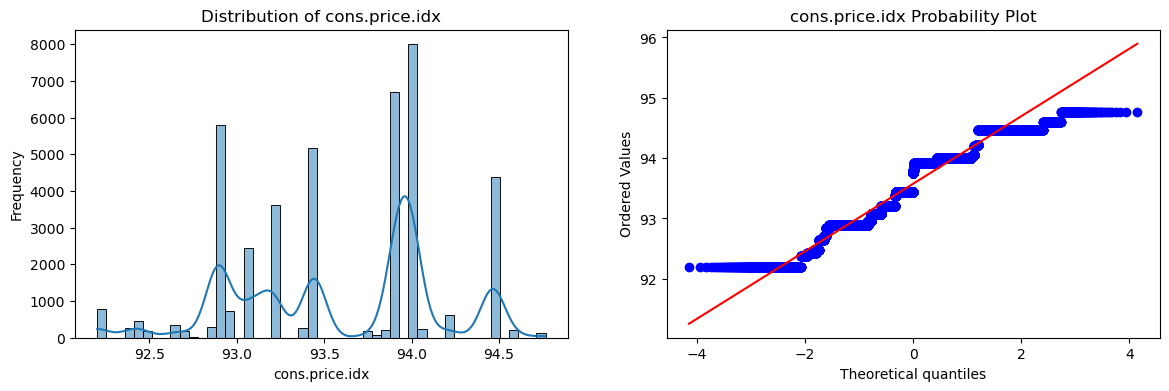


Column Name: cons.conf.idx
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


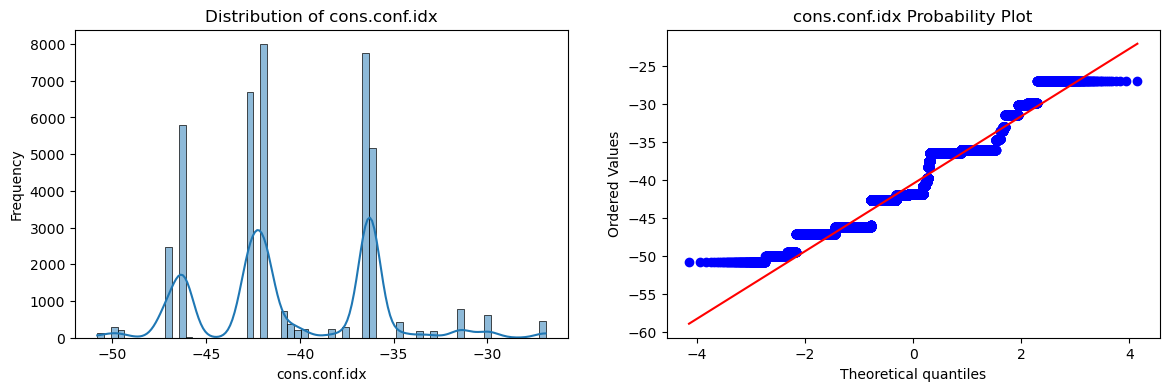


Column Name: euribor3m
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


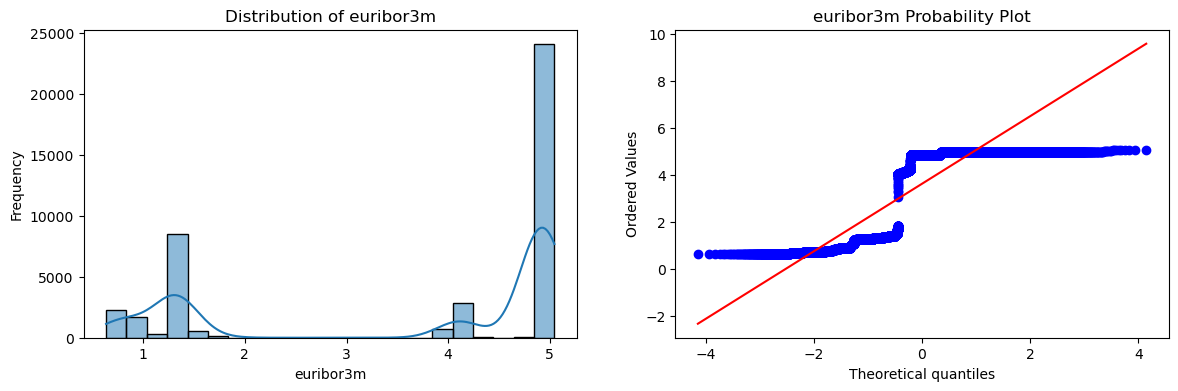


Column Name: nr.employed
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


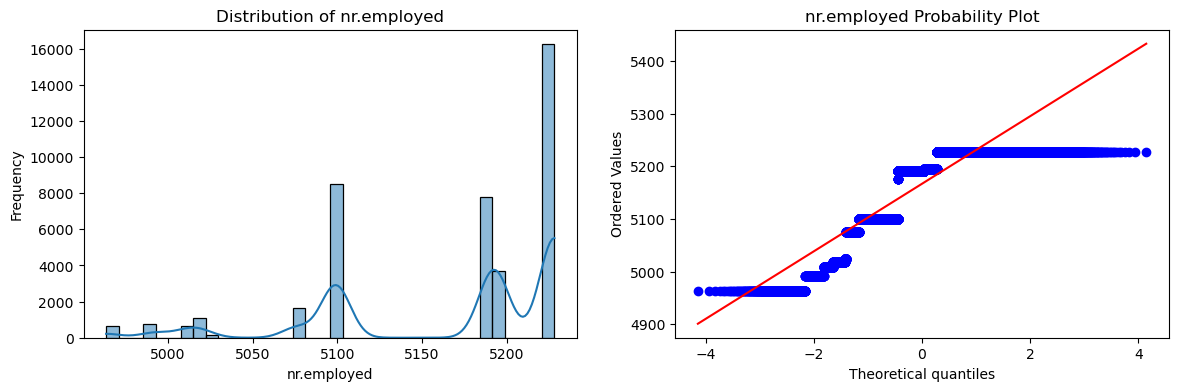


Column Name: y
y
no     36548
yes     4640
Name: count, dtype: int64


In [6]:

def explore_data(df):
    """
    Explores numerical and categorical features of a pandas DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to explore.

    Returns:
        None
    """

    cols = list(df.columns)

    for col_name in cols:
        print(f"\nColumn Name: {col_name}")

        if pd.api.types.is_numeric_dtype(df[col_name]):
            print(df[col_name].describe())

            plt.figure(figsize=(14, 4))
            plt.subplot(121)
            sns.histplot(df[col_name], kde=True)  
            plt.xlabel(col_name)
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {col_name}")

            plt.subplot(122)
            try:
                stats.probplot(df[col_name], dist='norm', plot=plt)
                plt.title(f"{col_name} Probability Plot")
            except Exception as e:
                print(f"Error generating probability plot for {col_name}: {e}")
            plt.show()

        else:
            print(df[col_name].value_counts())


explore_data(df)


In [7]:
df = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['loan'] != 'unknown') & (df['housing'] != 'unknown')]

In [8]:
df.shape

(39803, 21)

In [9]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['default'] = df['default'].map({'no': 0, 'yes': 1, 'unknown': np.nan})

In [14]:
imputer = SimpleImputer(strategy='most_frequent')

df['default'] = imputer.fit_transform(df[['default']])


In [15]:
df['default'] = df['default'].map({0.0: 'no', 1.0: 'yes'})

In [16]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['default'].head()

0    no
1    no
2    no
3    no
4    no
Name: default, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

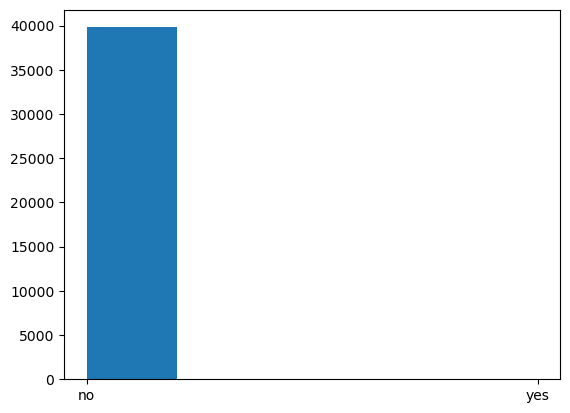

In [18]:
plt.hist(df['default'],bins=5)
plt.show

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [21]:
skew_threshold = 0.5 
numeric_columns = ['age','duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
skewed_features = [col for col in numeric_columns if df[col].skew() > skew_threshold ]
skewed_features 


['age', 'duration', 'campaign', 'previous']

In [22]:
pt = PowerTransformer()
df_transformed = df.copy()
for col in skewed_features:
    df_transformed[col] = pt.fit_transform(df_transformed[[col]])

In [23]:
df_transformed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.432350,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1.045918,999,-0.397500,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1.497065,services,married,high.school,no,no,no,telephone,may,mon,...,-1.045918,999,-0.397500,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,-0.153310,services,married,high.school,no,yes,no,telephone,may,mon,...,-1.045918,999,-0.397500,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,0.155387,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1.045918,999,-0.397500,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1.432350,services,married,high.school,no,no,yes,telephone,may,mon,...,-1.045918,999,-0.397500,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.376505,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.045918,999,-0.397500,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0.696655,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.045918,999,-0.397500,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,1.432350,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0.244858,999,-0.397500,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0.526186,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.045918,999,-0.397500,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


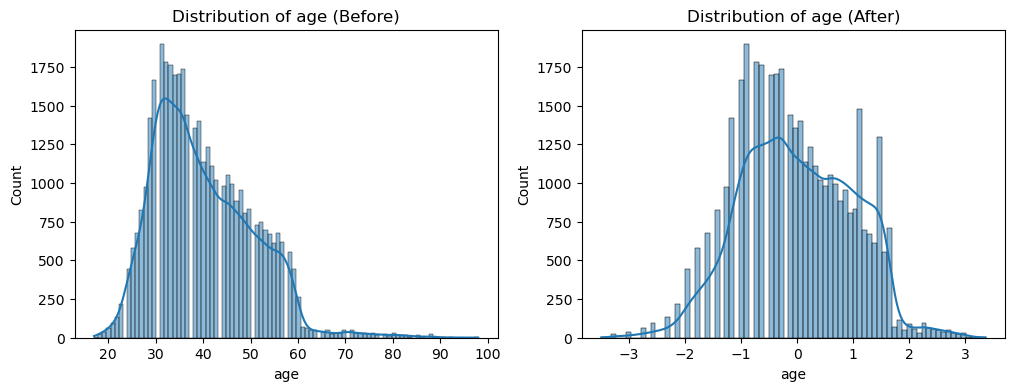

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


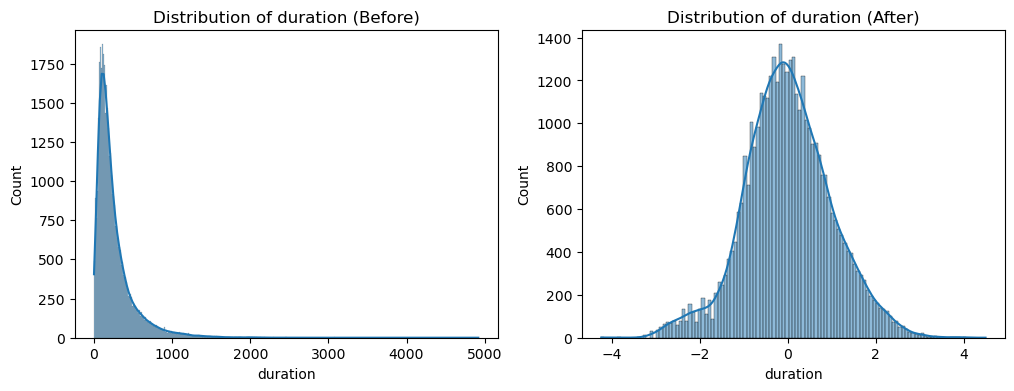

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


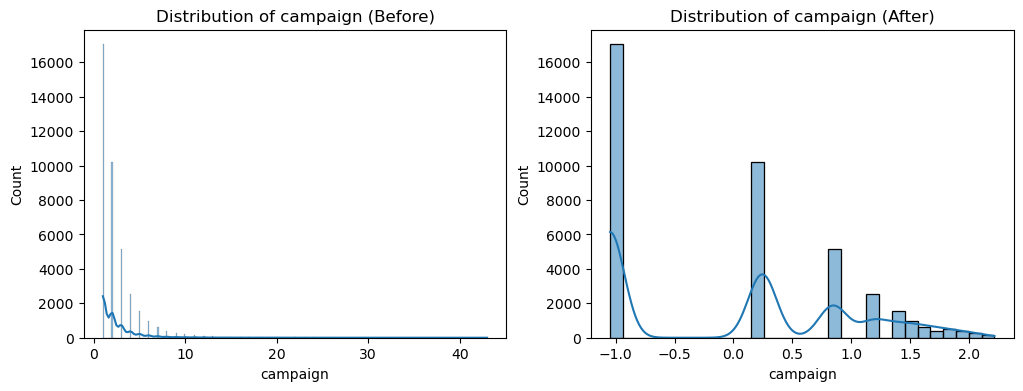

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


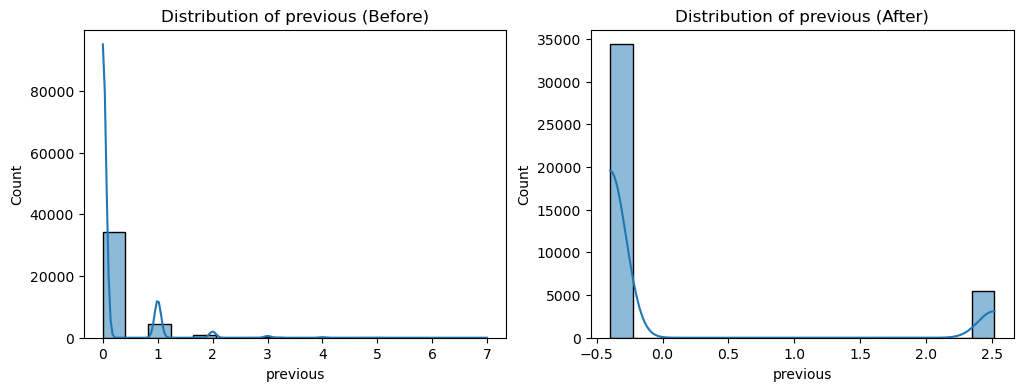

In [24]:

def plot_before_after(df, col):
  """
  Plots histograms of a feature before and after transformation in subplots.

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature.
      col (str): The name of the feature to plot.
  """
  fig, (ax1, ax2) = subplots(1, 2, figsize=(12, 4))  
  sns.histplot(df[col], kde=True, label='Before Transformation', ax=ax1)
  ax1.set_title(f'Distribution of {col} (Before)')

  
  pt = PowerTransformer()
  df_transformed = df.copy()
  df_transformed[col] = pt.fit_transform(df_transformed[[col]])
  sns.histplot(df_transformed[col], kde=True, label='After Power Transform', ax=ax2)
  ax2.set_title(f'Distribution of {col} (After)')
  plt.show()



for col in skewed_features:
  plot_before_after(df.copy(), col)
  plt.show() 


In [25]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39803 non-null  float64
 1   job             39803 non-null  object 
 2   marital         39803 non-null  object 
 3   education       39803 non-null  object 
 4   default         39803 non-null  object 
 5   housing         39803 non-null  object 
 6   loan            39803 non-null  object 
 7   contact         39803 non-null  object 
 8   month           39803 non-null  object 
 9   day_of_week     39803 non-null  object 
 10  duration        39803 non-null  float64
 11  campaign        39803 non-null  float64
 12  pdays           39803 non-null  int64  
 13  previous        39803 non-null  float64
 14  poutcome        39803 non-null  object 
 15  emp.var.rate    39803 non-null  float64
 16  cons.price.idx  39803 non-null  float64
 17  cons.conf.idx   39803 non-null  floa

In [26]:
import pandas as pd
import numpy as np

numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns
categorical_cols = df_transformed.select_dtypes(include=[object]).columns

# Create DataFrames for numeric and categorical data
df_numeric = df_transformed[numeric_cols]
df_categorical = df_transformed[categorical_cols]


In [27]:
df_numeric 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.432350,0.388309,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0
1,1.497065,-0.236012,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0
2,-0.153310,0.223568,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0
3,0.155387,-0.221688,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0
4,1.432350,0.577756,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,2.376505,0.677709,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6
41184,0.696655,0.842364,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6
41185,1.432350,0.023256,0.244858,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6
41186,0.526186,1.017824,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6


In [28]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [29]:
df_categorical['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [30]:
feature_groups = {
  'job': {  # Group similar job types
    'admin.': 'Management & Administration',
    'management': 'Management & Administration',
    'blue-collar': 'Blue-collar & Service',
    'services': 'Blue-collar & Service',
    'professional.course': 'Professional & Technical',
    'technician': 'Professional & Technical',
    'entrepreneur': 'Business & Self-Employed',  
    'self-employed': 'Business & Self-Employed',  
    'student': 'Non-Active Workforce',
    'unemployed': 'Non-Active Workforce',
    'retired': 'Non-Active Workforce',
    'housemaid': 'Housemaid'
  },
  'education': {  # Group by attainment level
    'basic.4y': 'Basic & Secondary',
    'basic.6y': 'Basic & Secondary',
    'basic.9y': 'Basic & Secondary',
    'high.school': 'Basic & Secondary',
    'professional.course': 'Vocational/Professional & University',
    'university.degree': 'Vocational/Professional & University',
    'illiterate': 'Others',
    'unknown': 'Others'
  },
  'month': {  # Seasonal encoding for month
    'jan': 'Winter',
    'feb': 'Winter',
    'mar': 'Spring',
    'apr': 'Spring',
    'may': 'Spring',
    'jun': 'Summer',
    'jul': 'Summer',
    'aug': 'Summer',
    'sep': 'Fall',
    'oct': 'Fall',
    'nov': 'Fall',
    'dec': 'Winter'
  }
}


In [31]:
for col, group_map in feature_groups.items():
  df_categorical[f'{col}_group'] = df_categorical[col].map(group_map)


C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1855611255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[f'{col}_group'] = df_categorical[col].map(group_map)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1855611255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[f'{col}_group'] = df_categorical[col].map(group_map)
C:\Users\hp\AppData\Local\Temp\ipykernel_10184\1855611255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [32]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,job_group,education_group,month_group
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,Housemaid,Basic & Secondary,Spring
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,Management & Administration,Basic & Secondary,Spring
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,Non-Active Workforce,Vocational/Professional & University,Fall
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no,Blue-collar & Service,Vocational/Professional & University,Fall
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no,Non-Active Workforce,Vocational/Professional & University,Fall
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes,Professional & Technical,Vocational/Professional & University,Fall


In [33]:
df_categorical.drop(feature_groups.keys(), axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10184\2706016514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop(feature_groups.keys(), axis=1, inplace=True)


In [34]:
df_categorical

,marital,default,housing,loan,contact,day_of_week,poutcome,y,job_group,education_group,month_group
0,married,no,no,no,telephone,mon,nonexistent,no,Housemaid,Basic & Secondary,Spring
1,married,no,no,no,telephone,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
2,married,no,yes,no,telephone,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
3,married,no,no,no,telephone,mon,nonexistent,no,Management & Administration,Basic & Secondary,Spring
4,married,no,no,yes,telephone,mon,nonexistent,no,Blue-collar & Service,Basic & Secondary,Spring
...,...,...,...,...,...,...,...,...,...,...,...
41183,married,no,yes,no,cellular,fri,nonexistent,yes,Non-Active Workforce,Vocational/Professional & University,Fall
41184,married,no,no,no,cellular,fri,nonexistent,no,Blue-collar & Service,Vocational/Professional & University,Fall
41185,married,no,yes,no,cellular,fri,nonexistent,no,Non-Active Workforce,Vocational/Professional & University,Fall
41186,married,no,no,no,cellular,fri,nonexistent,yes,Professional & Technical,Vocational/Professional & University,Fall


In [35]:
for col_name in df_categorical.columns:
    print(df_categorical[col_name].value_counts())

marital
married     24110
single      11215
divorced     4478
Name: count, dtype: int64
default
no     39800
yes        3
Name: count, dtype: int64
housing
yes    21376
no     18427
Name: count, dtype: int64
loan
no     33620
yes     6183
Name: count, dtype: int64
contact
cellular     25369
telephone    14434
Name: count, dtype: int64
day_of_week
thu    8342
mon    8230
wed    7856
tue    7797
fri    7578
Name: count, dtype: int64
poutcome
nonexistent    34372
failure         4110
success         1321
Name: count, dtype: int64
y
no     35316
yes     4487
Name: count, dtype: int64
job_group
Management & Administration    13031
Blue-collar & Service          12863
Professional & Technical        6584
Non-Active Workforce            3504
Business & Self-Employed        2793
Housemaid                       1028
Name: count, dtype: int64
education_group
Basic & Secondary                       21306
Vocational/Professional & University    16921
Others                                   1576
N

In [36]:
df_categorical.columns

Index(['marital', 'default', 'housing', 'loan', 'contact', 'day_of_week',
       'poutcome', 'y', 'job_group', 'education_group', 'month_group'],
      dtype='object')

In [37]:
target_mapping = {'yes': 1, 'no': 0}
df_categorical.loc[:, 'y'] = df_categorical['y'].map(target_mapping)
df_categorical.head()  


,marital,default,housing,loan,contact,day_of_week,poutcome,y,job_group,education_group,month_group
0,married,no,no,no,telephone,mon,nonexistent,0,Housemaid,Basic & Secondary,Spring
1,married,no,no,no,telephone,mon,nonexistent,0,Blue-collar & Service,Basic & Secondary,Spring
2,married,no,yes,no,telephone,mon,nonexistent,0,Blue-collar & Service,Basic & Secondary,Spring
3,married,no,no,no,telephone,mon,nonexistent,0,Management & Administration,Basic & Secondary,Spring
4,married,no,no,yes,telephone,mon,nonexistent,0,Blue-collar & Service,Basic & Secondary,Spring


In [38]:
df_categorical.info()


<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   marital          39803 non-null  object
 1   default          39803 non-null  object
 2   housing          39803 non-null  object
 3   loan             39803 non-null  object
 4   contact          39803 non-null  object
 5   day_of_week      39803 non-null  object
 6   poutcome         39803 non-null  object
 7   y                39803 non-null  object
 8   job_group        39803 non-null  object
 9   education_group  39803 non-null  object
 10  month_group      39803 non-null  object
dtypes: object(11)
memory usage: 3.6+ MB


In [39]:
encode_df=df_categorical.drop(columns='y')

In [40]:
encode_df.head(3)

,marital,default,housing,loan,contact,day_of_week,poutcome,job_group,education_group,month_group
0,married,no,no,no,telephone,mon,nonexistent,Housemaid,Basic & Secondary,Spring
1,married,no,no,no,telephone,mon,nonexistent,Blue-collar & Service,Basic & Secondary,Spring
2,married,no,yes,no,telephone,mon,nonexistent,Blue-collar & Service,Basic & Secondary,Spring


In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["marital", "default", "housing", "loan", "contact", "day_of_week",
                   "poutcome", "job_group", "education_group", "month_group"]

encoder = OneHotEncoder(handle_unknown='ignore', drop='first') 

encoder.fit(encode_df[categorical_cols])

encoded_col_names = encoder.get_feature_names_out(categorical_cols)

encoded_features = encoder.transform(encode_df[categorical_cols])


In [42]:
encoded_features_dense = encoded_features.toarray()
encoded_df = encode_df.assign(**dict(zip(encoded_col_names, encoded_features_dense.T)))


In [43]:
encoded_df=encoded_df.drop(columns=["marital", "default", "housing", "loan", "contact", "day_of_week",
                   "poutcome", "job_group", "education_group", "month_group"],axis=1)

In [44]:
encoded_df.columns

Index(['marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'job_group_Business & Self-Employed',
       'job_group_Housemaid', 'job_group_Management & Administration',
       'job_group_Non-Active Workforce', 'job_group_Professional & Technical',
       'education_group_Others',
       'education_group_Vocational/Professional & University',
       'month_group_Spring', 'month_group_Summer', 'month_group_Winter'],
      dtype='object')

In [45]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   marital_married                                       39803 non-null  float64
 1   marital_single                                        39803 non-null  float64
 2   default_yes                                           39803 non-null  float64
 3   housing_yes                                           39803 non-null  float64
 4   loan_yes                                              39803 non-null  float64
 5   contact_telephone                                     39803 non-null  float64
 6   day_of_week_mon                                       39803 non-null  float64
 7   day_of_week_thu                                       39803 non-null  float64
 8   day_of_week_tue                                       39803 n

In [46]:
combined_df = pd.concat([df_numeric , df_categorical, encoded_df], axis=1)
combined_df.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_group_Business & Self-Employed,job_group_Housemaid,job_group_Management & Administration,job_group_Non-Active Workforce,job_group_Professional & Technical,education_group_Others,education_group_Vocational/Professional & University,month_group_Spring,month_group_Summer,month_group_Winter
0,1.432350,0.388309,-1.045918,999,-0.3975,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.497065,-0.236012,-1.045918,999,-0.3975,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.153310,0.223568,-1.045918,999,-0.3975,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   39803 non-null  float64
 1   duration                                              39803 non-null  float64
 2   campaign                                              39803 non-null  float64
 3   pdays                                                 39803 non-null  int64  
 4   previous                                              39803 non-null  float64
 5   emp.var.rate                                          39803 non-null  float64
 6   cons.price.idx                                        39803 non-null  float64
 7   cons.conf.idx                                         39803 non-null  float64
 8   euribor3m                                             39803 n

In [48]:
combined_df=combined_df.drop(columns=["marital", "default", "housing", "loan", "contact", "day_of_week",
                   "poutcome", "job_group", "education_group", "month_group"],axis=1)

In [49]:
combined_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_group_Business & Self-Employed,job_group_Housemaid,job_group_Management & Administration,job_group_Non-Active Workforce,job_group_Professional & Technical,education_group_Others,education_group_Vocational/Professional & University,month_group_Spring,month_group_Summer,month_group_Winter
0,1.432350,0.388309,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.497065,-0.236012,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.153310,0.223568,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.155387,-0.221688,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.432350,0.577756,-1.045918,999,-0.397500,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.376505,0.677709,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
41184,0.696655,0.842364,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41185,1.432350,0.023256,0.244858,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
41186,0.526186,1.017824,-1.045918,999,-0.397500,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0



Column Name: age
count    3.980300e+04
mean    -2.484927e-16
std      1.000013e+00
min     -3.499230e+00
25%     -7.411757e-01
50%     -4.716687e-02
75%      7.785680e-01
max      3.363668e+00
Name: age, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


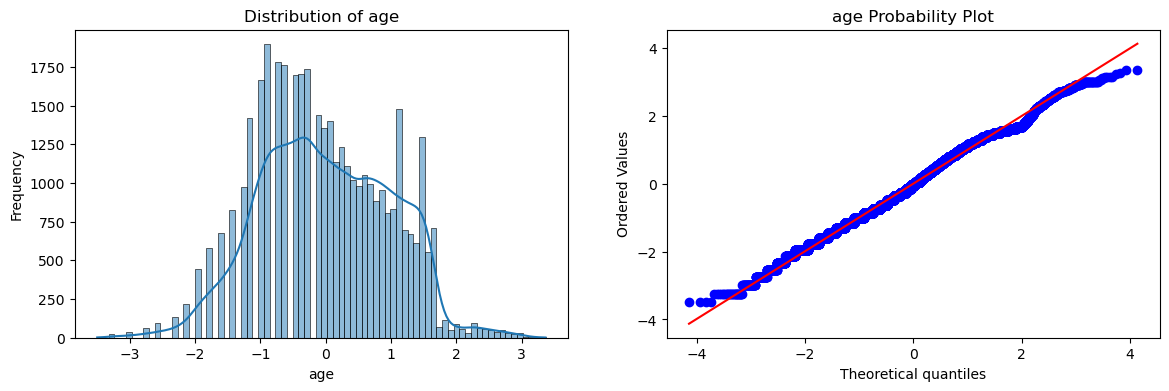


Column Name: duration
count    3.980300e+04
mean    -4.170107e-16
std      1.000013e+00
min     -4.248810e+00
25%     -6.327017e-01
50%     -3.060023e-02
75%      6.267984e-01
max      4.502196e+00
Name: duration, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


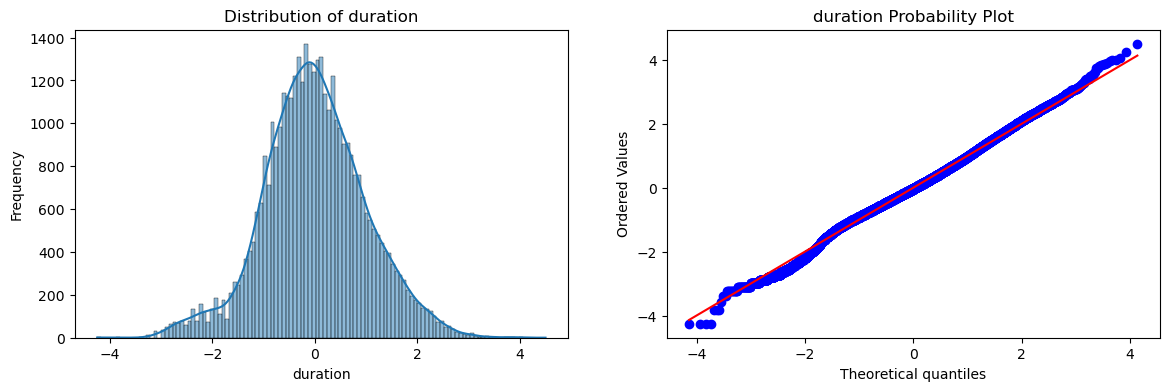


Column Name: campaign
count    3.980300e+04
mean    -8.168840e-16
std      1.000013e+00
min     -1.045918e+00
25%     -1.045918e+00
50%      2.448579e-01
75%      8.451144e-01
max      2.213560e+00
Name: campaign, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


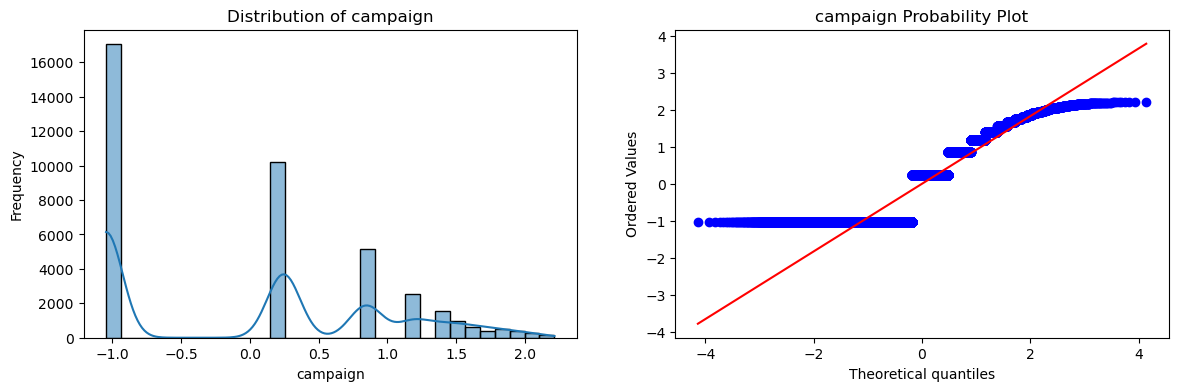


Column Name: pdays
count    39803.000000
mean       962.676884
std        186.413324
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


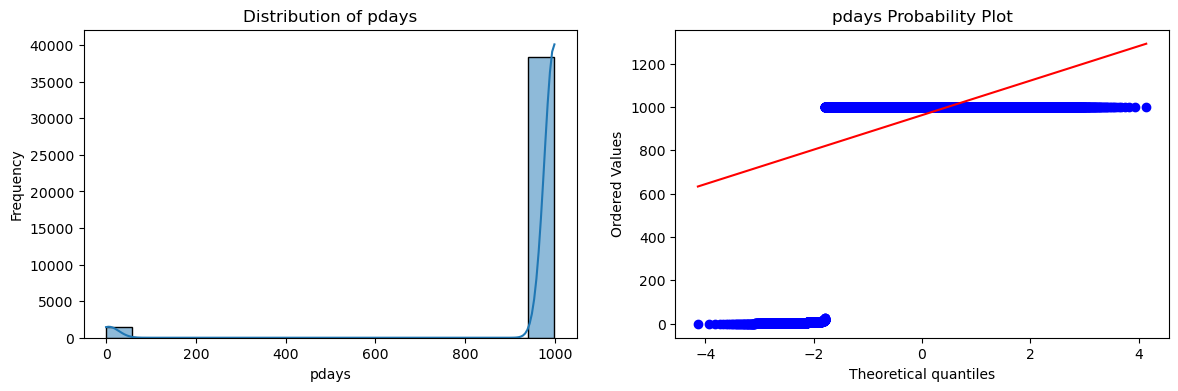


Column Name: previous
count    3.980300e+04
mean     2.284990e-17
std      1.000013e+00
min     -3.975002e-01
25%     -3.975002e-01
50%     -3.975002e-01
75%     -3.975002e-01
max      2.519770e+00
Name: previous, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


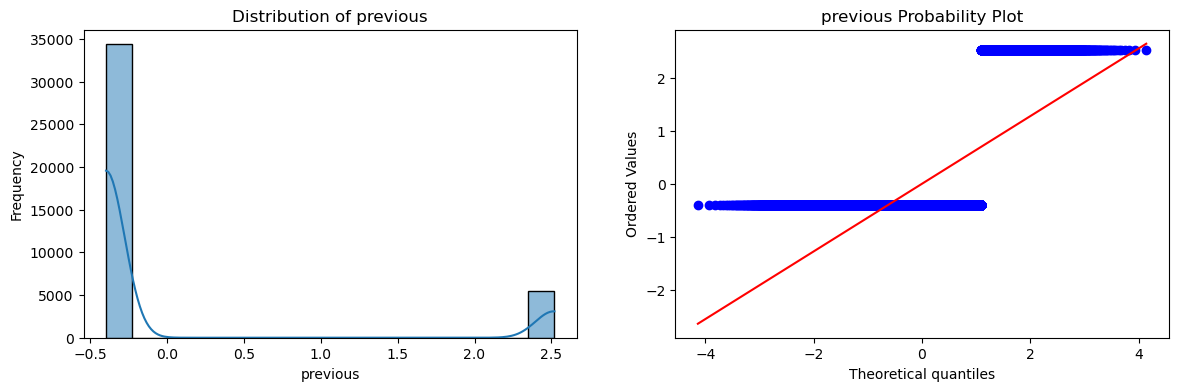


Column Name: emp.var.rate
count    39803.000000
mean         0.079785
std          1.569650
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


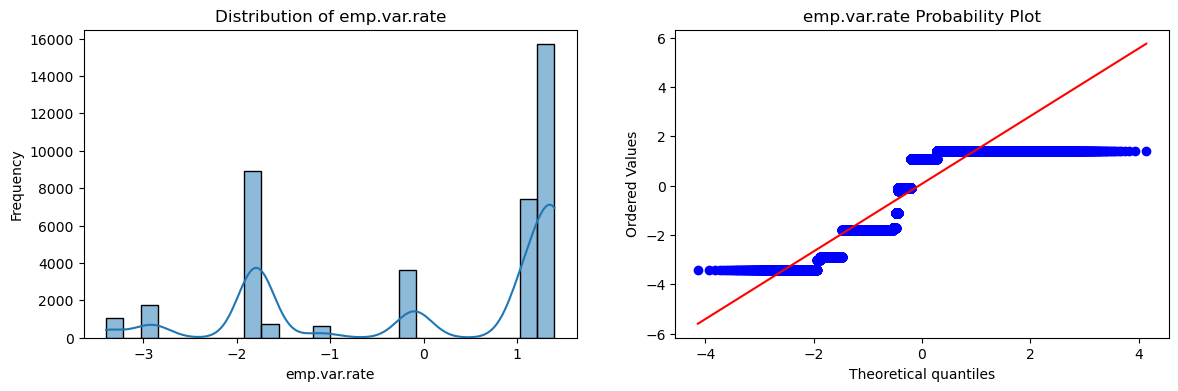


Column Name: cons.price.idx
count    39803.000000
mean        93.573304
std          0.577878
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


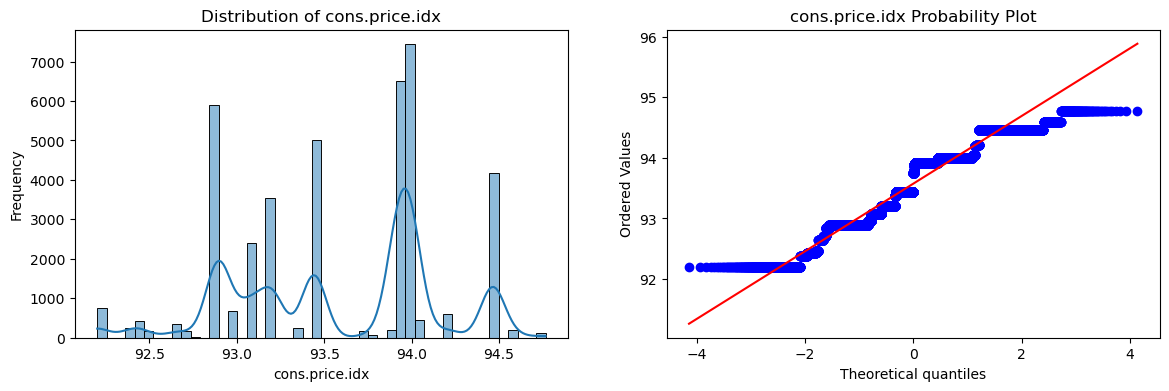


Column Name: cons.conf.idx
count    39803.000000
mean       -40.521024
std          4.628205
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


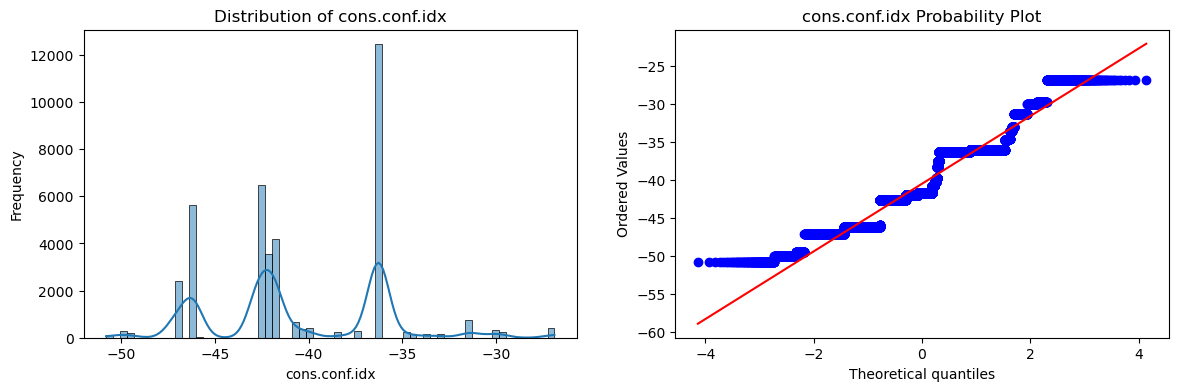


Column Name: euribor3m
count    39803.000000
mean         3.618797
std          1.734245
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


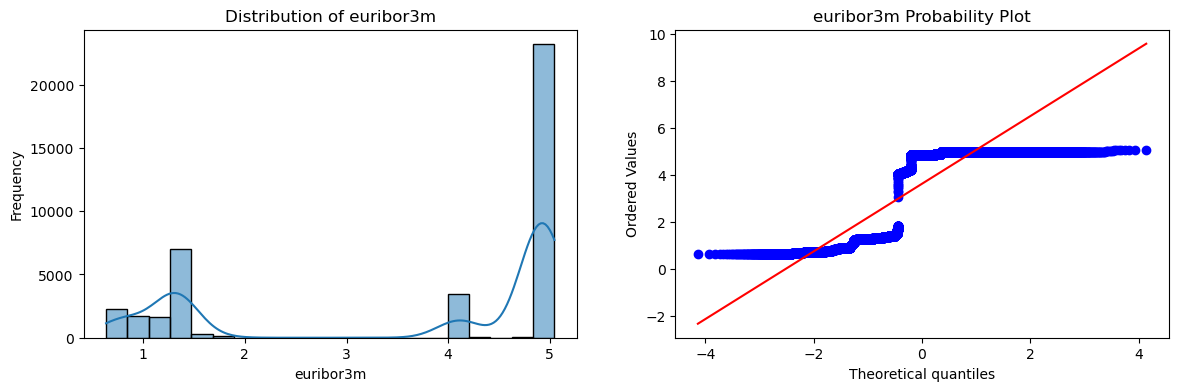


Column Name: nr.employed
count    39803.000000
mean      5167.034048
std         72.204816
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


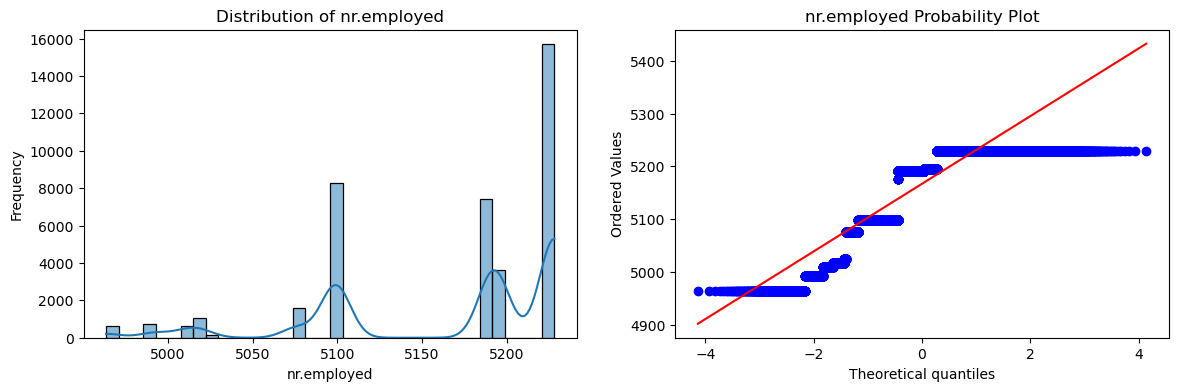


Column Name: y
y
0    35316
1     4487
Name: count, dtype: int64

Column Name: marital_married
count    39803.000000
mean         0.605733
std          0.488699
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: marital_married, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


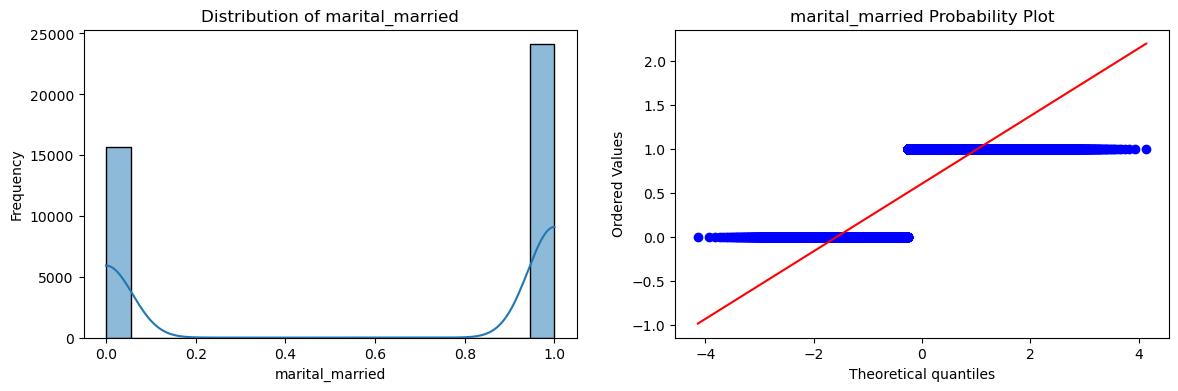


Column Name: marital_single
count    39803.000000
mean         0.281763
std          0.449864
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: marital_single, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


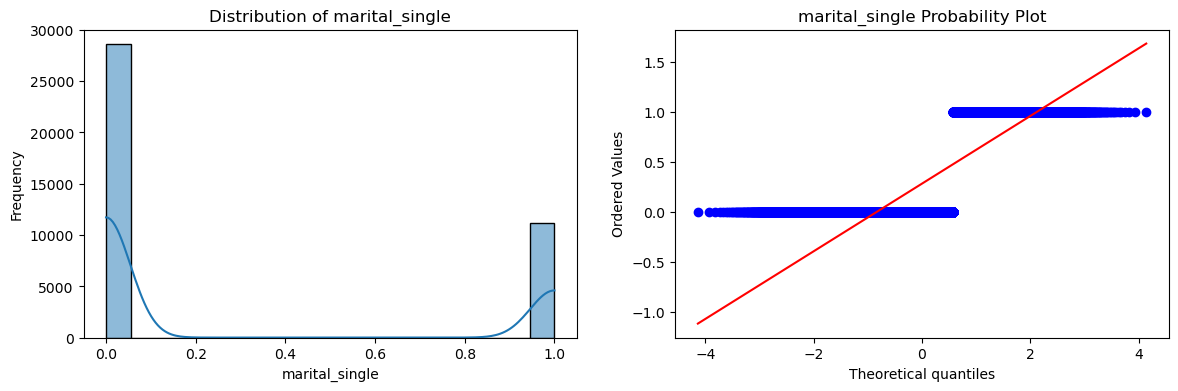


Column Name: default_yes
count    39803.000000
mean         0.000075
std          0.008681
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_yes, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


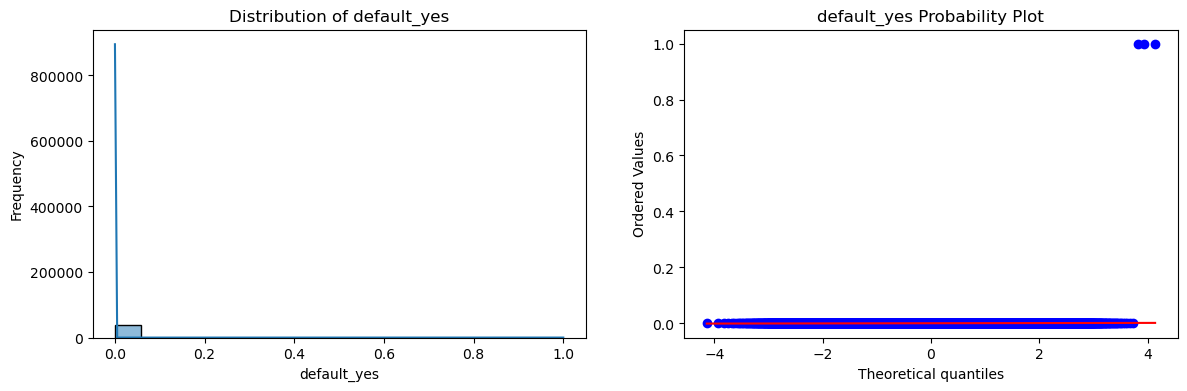


Column Name: housing_yes
count    39803.000000
mean         0.537045
std          0.498632
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: housing_yes, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


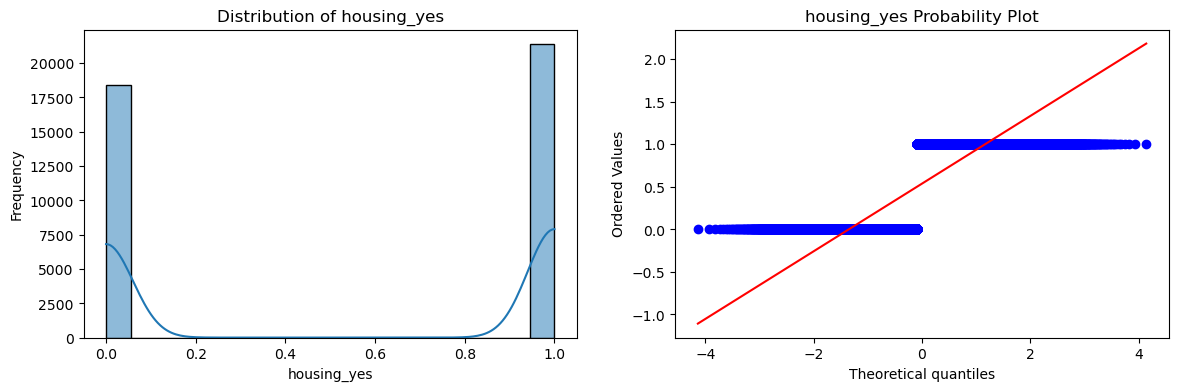


Column Name: loan_yes
count    39803.000000
mean         0.155340
std          0.362233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_yes, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


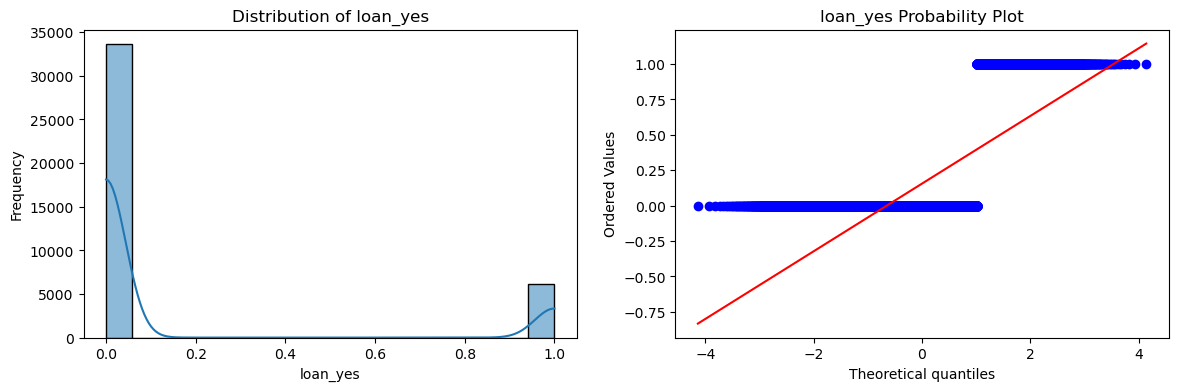


Column Name: contact_telephone
count    39803.000000
mean         0.362636
std          0.480767
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: contact_telephone, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


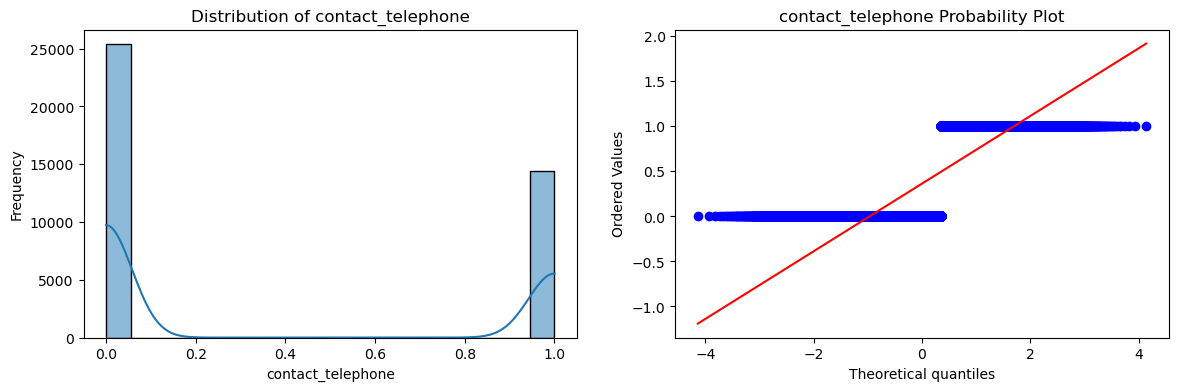


Column Name: day_of_week_mon
count    39803.000000
mean         0.206768
std          0.404993
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: day_of_week_mon, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


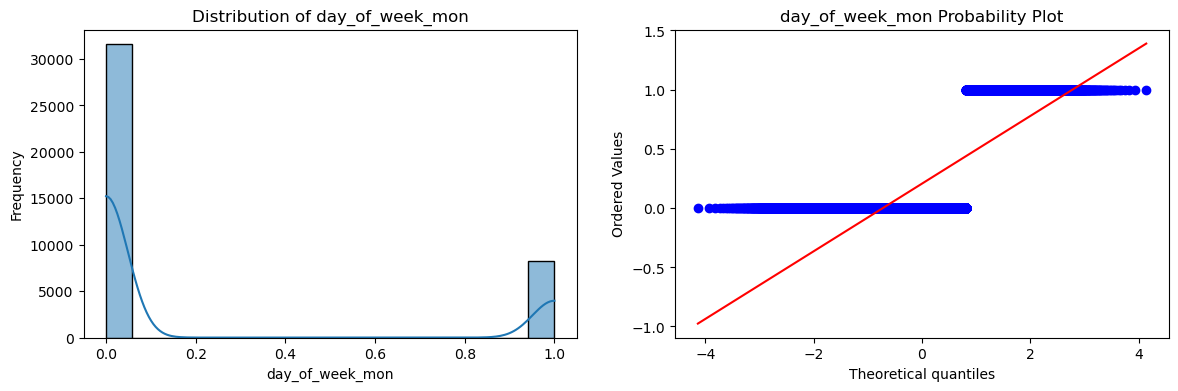


Column Name: day_of_week_thu
count    39803.000000
mean         0.209582
std          0.407016
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: day_of_week_thu, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


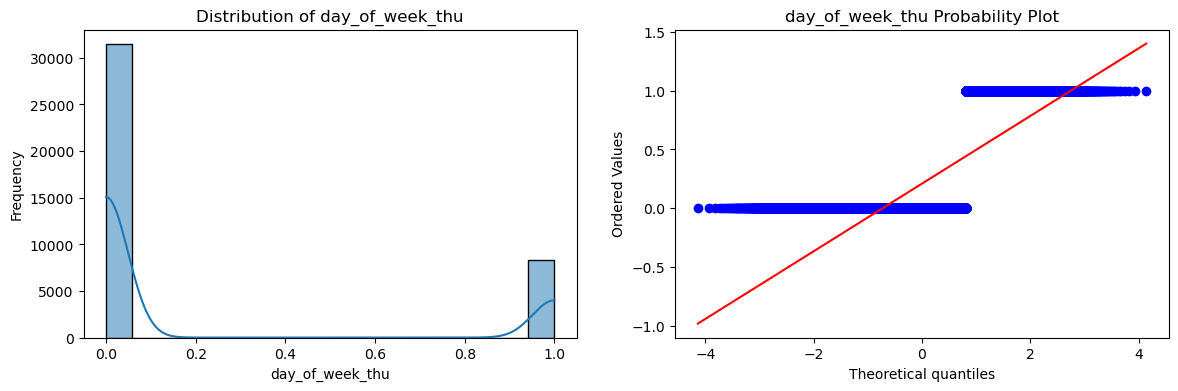


Column Name: day_of_week_tue
count    39803.000000
mean         0.195890
std          0.396889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: day_of_week_tue, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


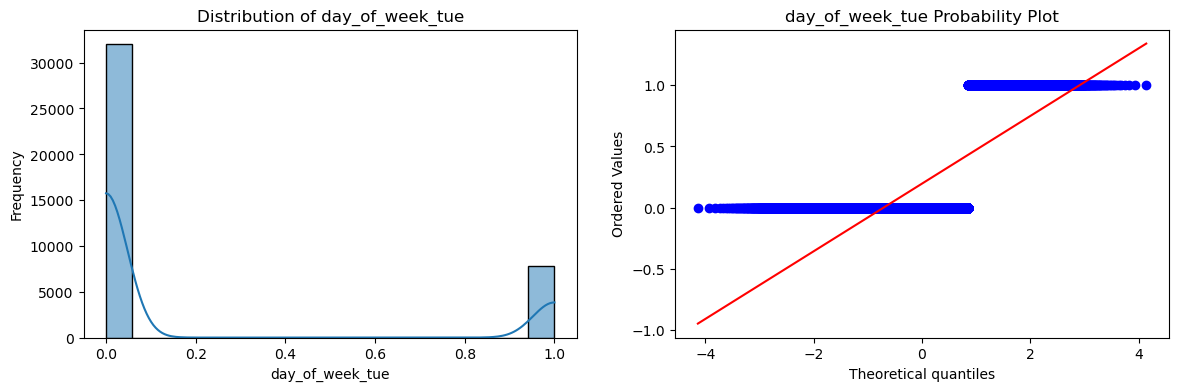


Column Name: day_of_week_wed
count    39803.000000
mean         0.197372
std          0.398020
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: day_of_week_wed, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


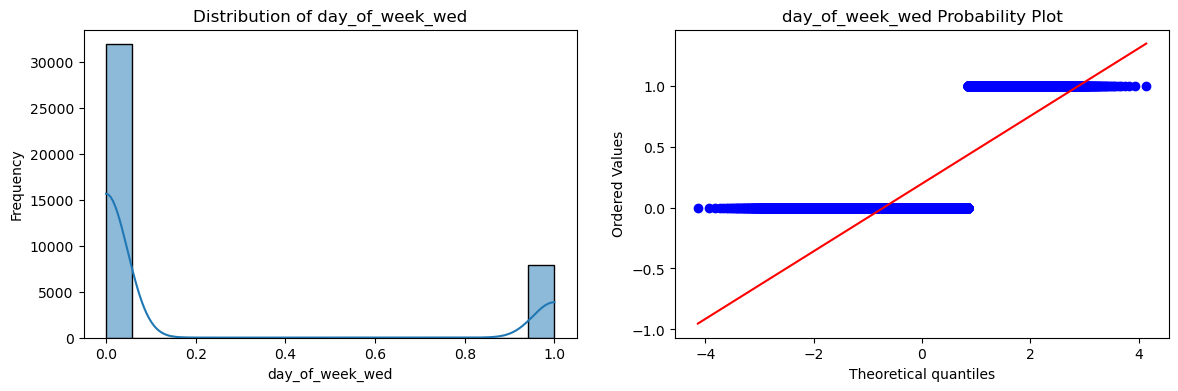


Column Name: poutcome_nonexistent
count    39803.000000
mean         0.863553
std          0.343267
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: poutcome_nonexistent, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


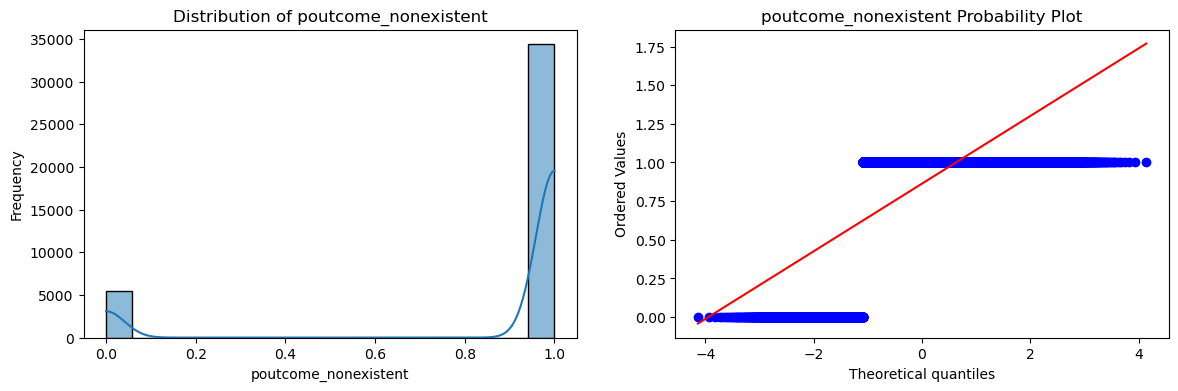


Column Name: poutcome_success
count    39803.000000
mean         0.033188
std          0.179131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: poutcome_success, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


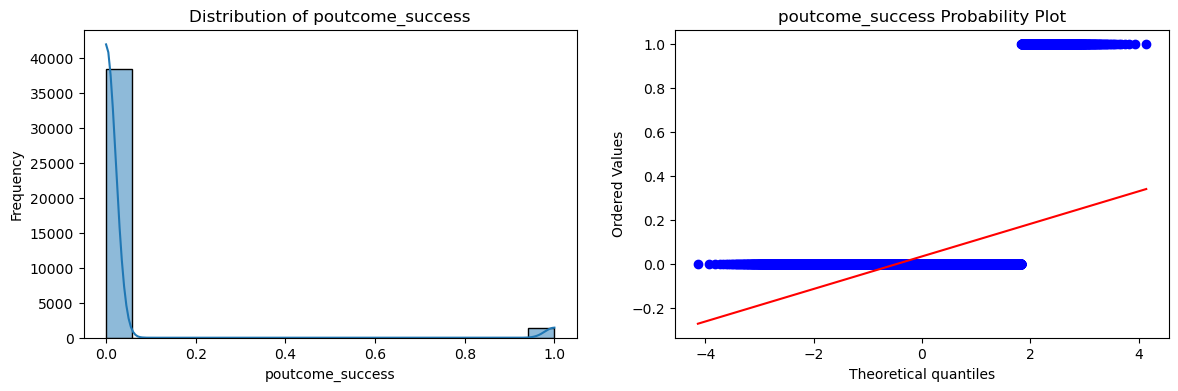


Column Name: job_group_Business & Self-Employed
count    39803.000000
mean         0.070171
std          0.255438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: job_group_Business & Self-Employed, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


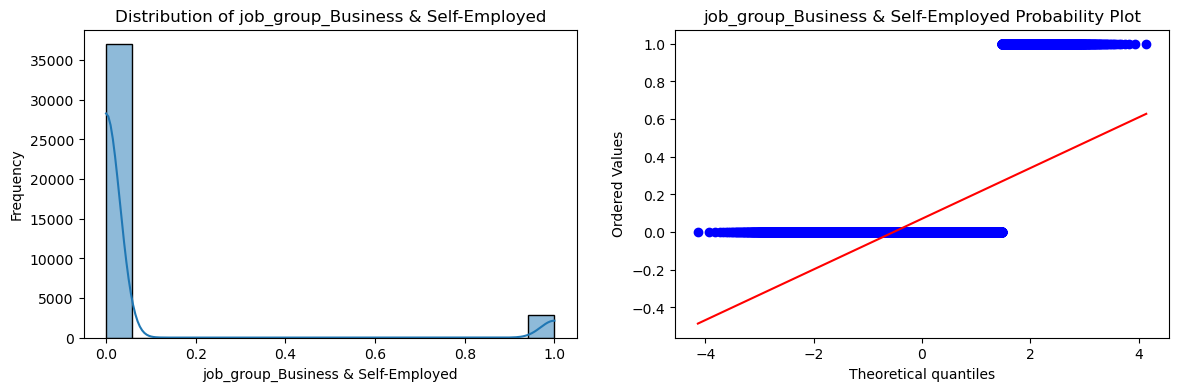


Column Name: job_group_Housemaid
count    39803.000000
mean         0.025827
std          0.158622
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: job_group_Housemaid, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


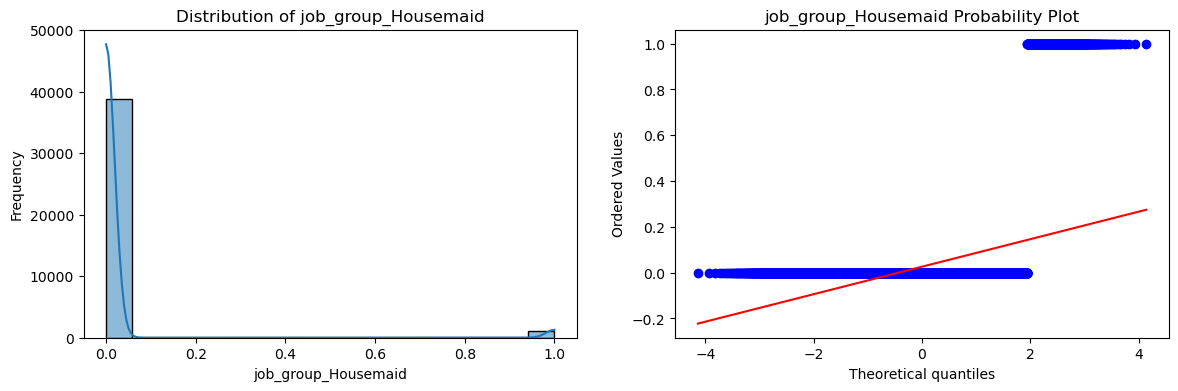


Column Name: job_group_Management & Administration
count    39803.000000
mean         0.327387
std          0.469266
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: job_group_Management & Administration, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


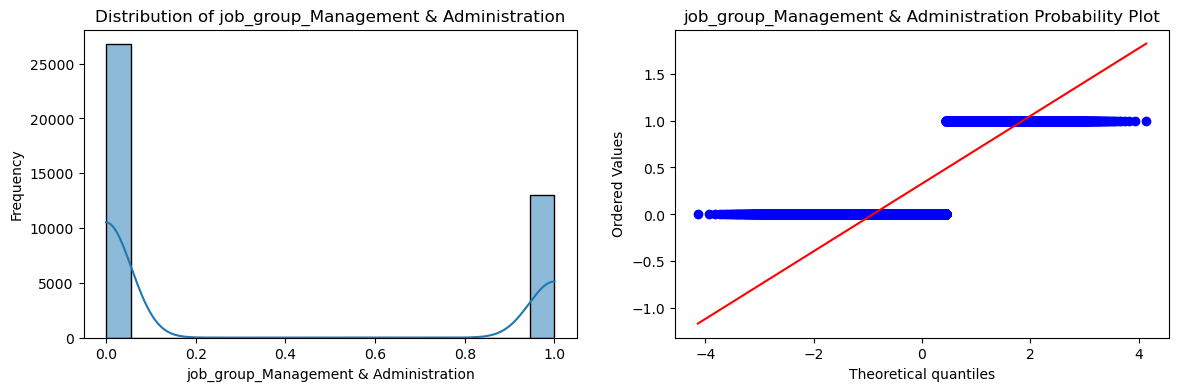


Column Name: job_group_Non-Active Workforce
count    39803.000000
mean         0.088034
std          0.283347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: job_group_Non-Active Workforce, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


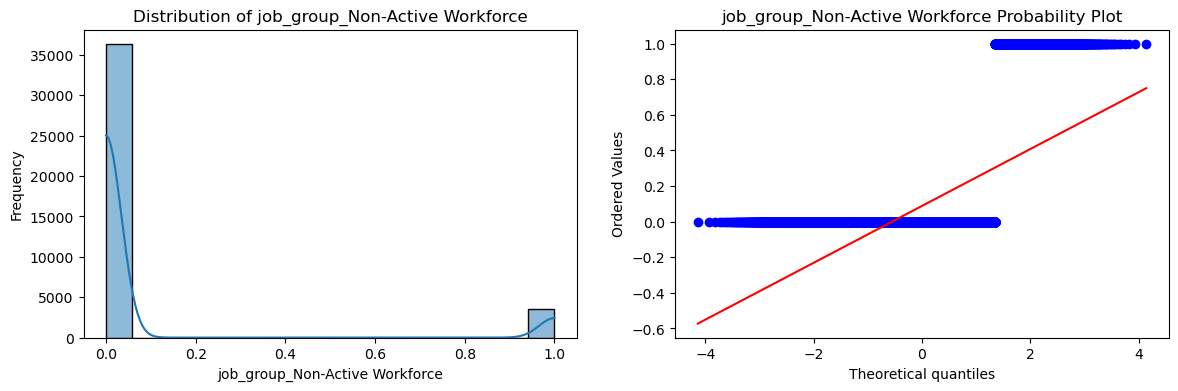


Column Name: job_group_Professional & Technical
count    39803.000000
mean         0.165415
std          0.371559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: job_group_Professional & Technical, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


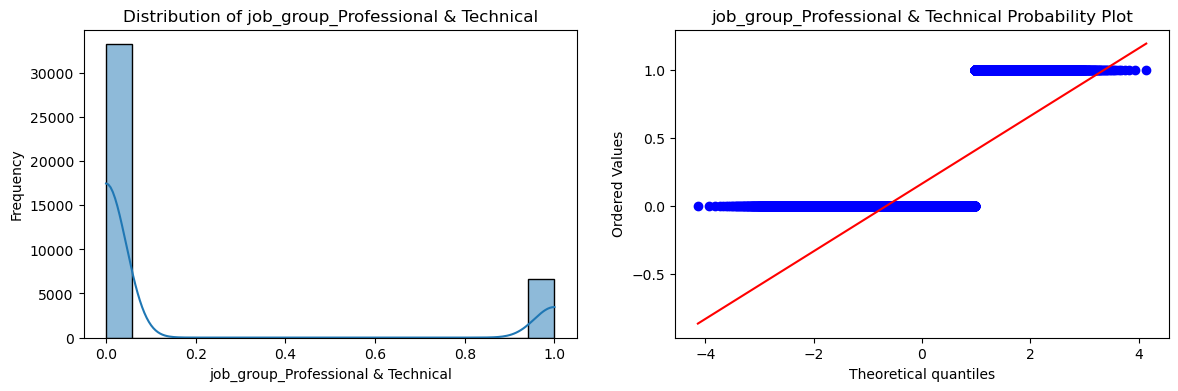


Column Name: education_group_Others
count    39803.000000
mean         0.039595
std          0.195008
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: education_group_Others, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


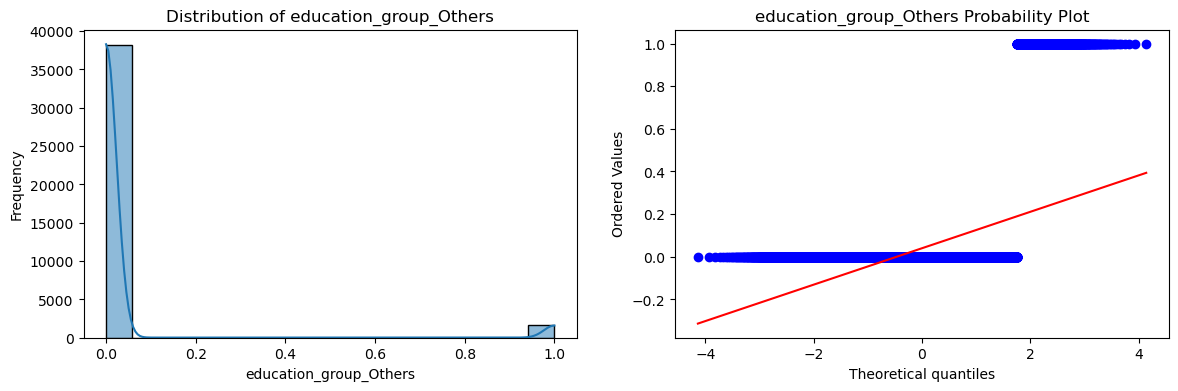


Column Name: education_group_Vocational/Professional & University
count    39803.000000
mean         0.425119
std          0.494367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: education_group_Vocational/Professional & University, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


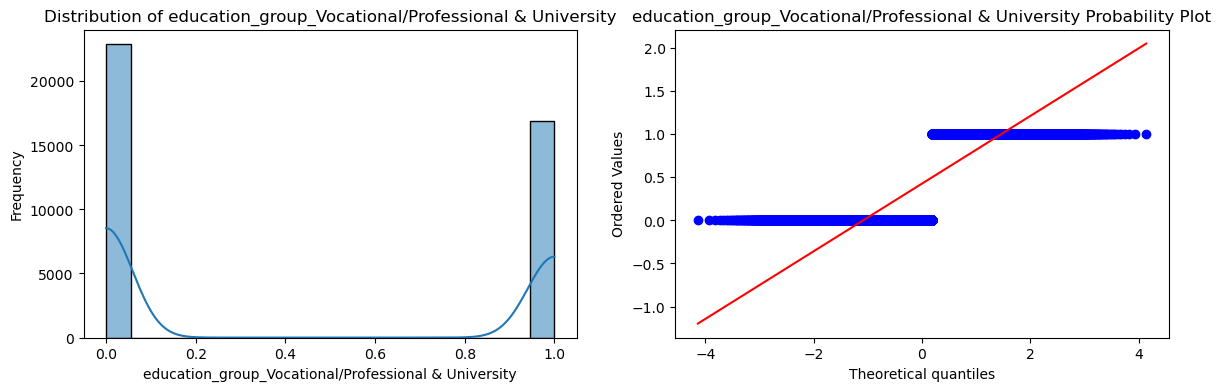


Column Name: month_group_Spring
count    39803.000000
mean         0.411150
std          0.492049
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: month_group_Spring, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


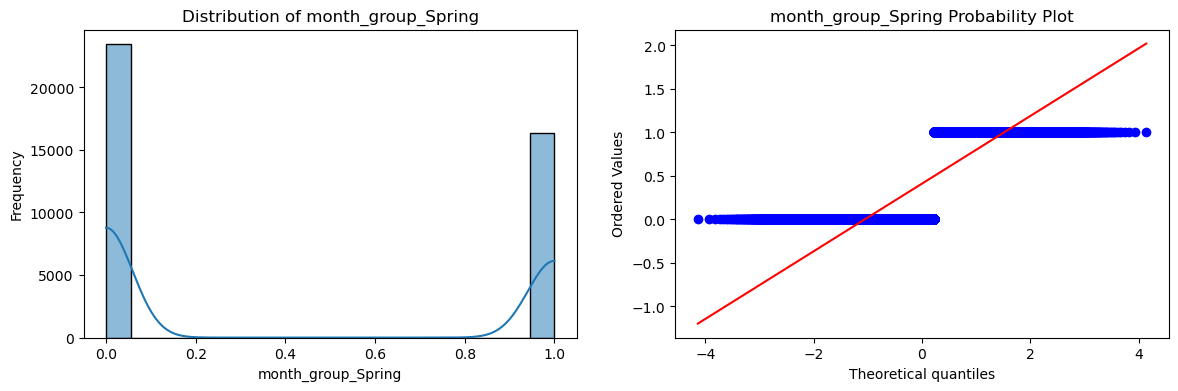


Column Name: month_group_Summer
count    39803.000000
mean         0.452730
std          0.497767
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: month_group_Summer, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


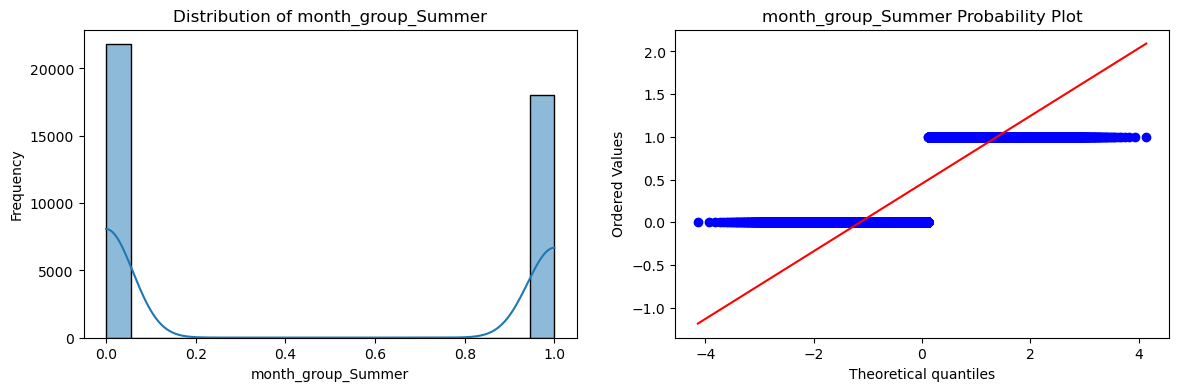


Column Name: month_group_Winter
count    39803.000000
mean         0.004372
std          0.065974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: month_group_Winter, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


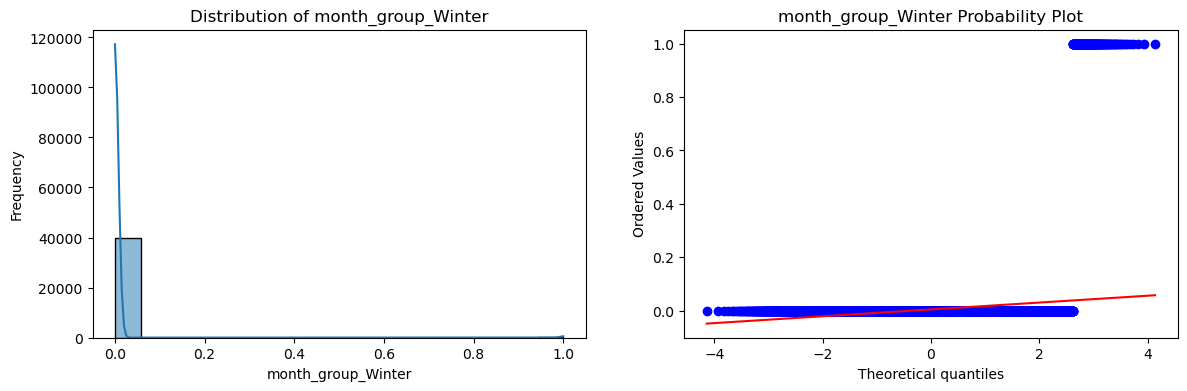

In [50]:
explore_data(combined_df)

In [51]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   39803 non-null  float64
 1   duration                                              39803 non-null  float64
 2   campaign                                              39803 non-null  float64
 3   pdays                                                 39803 non-null  int64  
 4   previous                                              39803 non-null  float64
 5   emp.var.rate                                          39803 non-null  float64
 6   cons.price.idx                                        39803 non-null  float64
 7   cons.conf.idx                                         39803 non-null  float64
 8   euribor3m                                             39803 n

In [52]:
combined_df['y'] = pd.to_numeric(combined_df['y'])

In [53]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   39803 non-null  float64
 1   duration                                              39803 non-null  float64
 2   campaign                                              39803 non-null  float64
 3   pdays                                                 39803 non-null  int64  
 4   previous                                              39803 non-null  float64
 5   emp.var.rate                                          39803 non-null  float64
 6   cons.price.idx                                        39803 non-null  float64
 7   cons.conf.idx                                         39803 non-null  float64
 8   euribor3m                                             39803 n

In [54]:
combined_df.duplicated().sum()

21

In [55]:
combined_df.drop_duplicates(inplace=True, keep='first')

In [56]:
combined_df.duplicated().sum()

0

In [57]:
# Calculate information value
def calc_iv(df, feature, target, pr=False, epsilon=1e-10):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        good_count = df[(df[feature] == val) & (df[target] == 0)].count()[feature] + epsilon
        bad_count = df[(df[feature] == val) & (df[target] == 1)].count()[feature] + epsilon
        total_count = good_count + bad_count

        lst.append([feature, val, total_count, good_count, bad_count])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()

    return iv, data

In [58]:
dataframe = combined_df.copy()

iv_age, data_age = calc_iv(dataframe, 'age', 'y')

In [59]:
iv_age, data_age

(0.28232180158703085,
    Variable     Value   All          Good           Bad     Share  \
 0       age -3.499230   4.0  3.000000e+00  1.000000e+00  0.000101   
 1       age -3.237056  27.0  1.500000e+01  1.200000e+01  0.000679   
 2       age -2.991372  40.0  2.200000e+01  1.800000e+01  0.001005   
 3       age -2.760392  65.0  4.200000e+01  2.300000e+01  0.001634   
 4       age -2.542596  98.0  7.000000e+01  2.800000e+01  0.002463   
 ..      ...       ...   ...           ...           ...       ...   
 73      age  3.121236   2.0  2.000000e+00  1.000000e-10  0.000050   
 74      age  3.157238   4.0  1.000000e+00  3.000000e+00  0.000101   
 75      age  3.227830   1.0  1.000000e+00  1.000000e-10  0.000025   
 76      age  3.262442   1.0  1.000000e+00  1.000000e-10  0.000025   
 77      age  3.363668   2.0  1.000000e-10  2.000000e+00  0.000050   
 
         Bad Rate  Distribution Good  Distribution Bad        WoE        IV  
 0   2.500000e-01       8.499547e-05      2.229157e-04  -0

In [60]:
iv_mon , data_mon  = calc_iv(dataframe, 'day_of_week_mon', 'y')
iv_mon , data_mon 

(0.00438736940149752,
           Variable  Value      All     Good     Bad     Share  Bad Rate  \
 0  day_of_week_mon    0.0  31555.0  27892.0  3663.0  0.793198  0.116083   
 1  day_of_week_mon    1.0   8227.0   7404.0   823.0  0.206802  0.100036   
 
    Distribution Good  Distribution Bad       WoE        IV  
 0           0.790231           0.81654 -0.032751  0.000862  
 1           0.209769           0.18346  0.134011  0.003526  )

In [61]:
features_to_process = [col for col in combined_df.columns if col != 'y']  
iv_data_dict = {}


for feature in features_to_process:
    iv, data = calc_iv(dataframe.copy(), feature, 'y')
    iv_data_dict[feature] = (iv, data)

data_frame_names = []


final_df = pd.DataFrame(columns=['Feature', 'IV', 'Average WoE'])

for feature, (iv, data) in iv_data_dict.items():
    final_df.loc[len(final_df)] = {'Feature': feature, 'IV': iv}

    if len(data) > 0:
        avg_woe = data['WoE'].mean()
        final_df.loc[len(final_df) - 1, 'Average WoE'] = avg_woe
        data.name = feature + '_data' 
        globals()[data.name] = data  
        data_frame_names.append(data.name)
    else:
        final_df.loc[len(final_df) - 1, 'Average WoE'] = np.nan 
        data_frame_names.append(None) 




In [62]:
final_df

,Feature,IV,Average WoE
0,age,0.282322,-0.950822
1,duration,7.669512,-1.743538
2,campaign,0.238276,13.668715
3,pdays,0.593978,-4.789758
4,previous,0.342676,1.049906
5,emp.var.rate,1.055992,-0.689114
6,cons.price.idx,1.303153,-1.188817
7,cons.conf.idx,1.303153,-1.188817
8,euribor3m,1.575694,0.326296
9,nr.employed,1.188042,-0.816241


In [63]:
for index, row in final_df.iterrows():
  feature = row['Feature']
  iv = row['IV']

  if iv < 0.02:
    category = "Not useful for prediction"
  elif 0.02 <= iv < 0.1:
    category = "Weak predictive power"
  elif 0.1 <= iv < 0.3:
    category = "Medium predictive power"
  elif 0.3 <= iv <= 0.5:
    category = "Strong predictive power"
  else:
    category = "Suspicious predictive power (requires further investigation)"

  print(f"Feature: {feature} - Category: {category}")


Feature: age - Category: Medium predictive power
Feature: duration - Category: Suspicious predictive power (requires further investigation)
Feature: campaign - Category: Medium predictive power
Feature: pdays - Category: Suspicious predictive power (requires further investigation)
Feature: previous - Category: Strong predictive power
Feature: emp.var.rate - Category: Suspicious predictive power (requires further investigation)
Feature: cons.price.idx - Category: Suspicious predictive power (requires further investigation)
Feature: cons.conf.idx - Category: Suspicious predictive power (requires further investigation)
Feature: euribor3m - Category: Suspicious predictive power (requires further investigation)
Feature: nr.employed - Category: Suspicious predictive power (requires further investigation)
Feature: marital_married - Category: Not useful for prediction
Feature: marital_single - Category: Weak predictive power
Feature: default_yes - Category: Not useful for prediction
Feature: h

In [68]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39782 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   age                                                   39782 non-null  float64
 1   duration                                              39782 non-null  float64
 2   campaign                                              39782 non-null  float64
 3   pdays                                                 39782 non-null  int64  
 4   previous                                              39782 non-null  float64
 5   emp.var.rate                                          39782 non-null  float64
 6   cons.price.idx                                        39782 non-null  float64
 7   cons.conf.idx                                         39782 non-null  float64
 8   euribor3m                                             39782 n

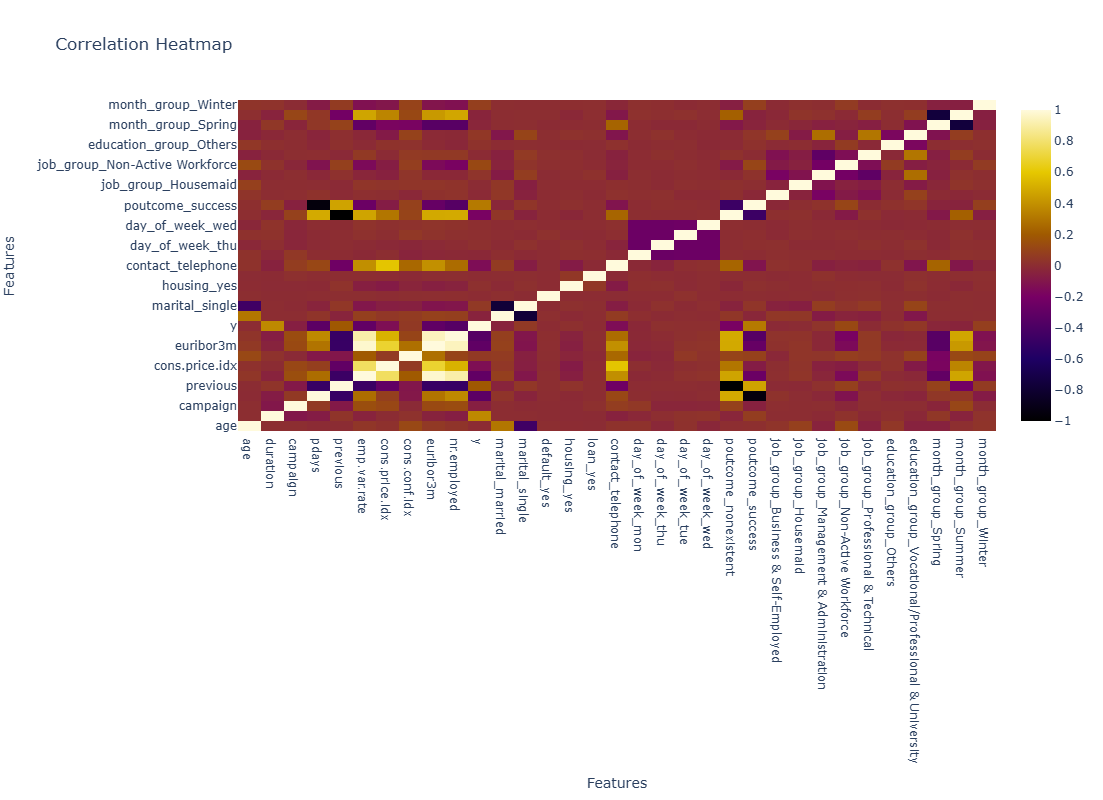

In [78]:
corr_matrix = combined_df.corr()
corr_matrix_data = corr_matrix.values.tolist()

row_labels = corr_matrix.index.to_numpy()
col_labels = corr_matrix.columns.to_numpy()

fig = Figure(layout=dict(width=800, height=800)) 
fig.add_trace(dict(
    z=corr_matrix_data,
    x=col_labels,
    y=row_labels.tolist(),  
    type='heatmap',
    colorscale='electric'  
))
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.update_traces(colorbar=dict(dtick=0.2)) 
fig.show()

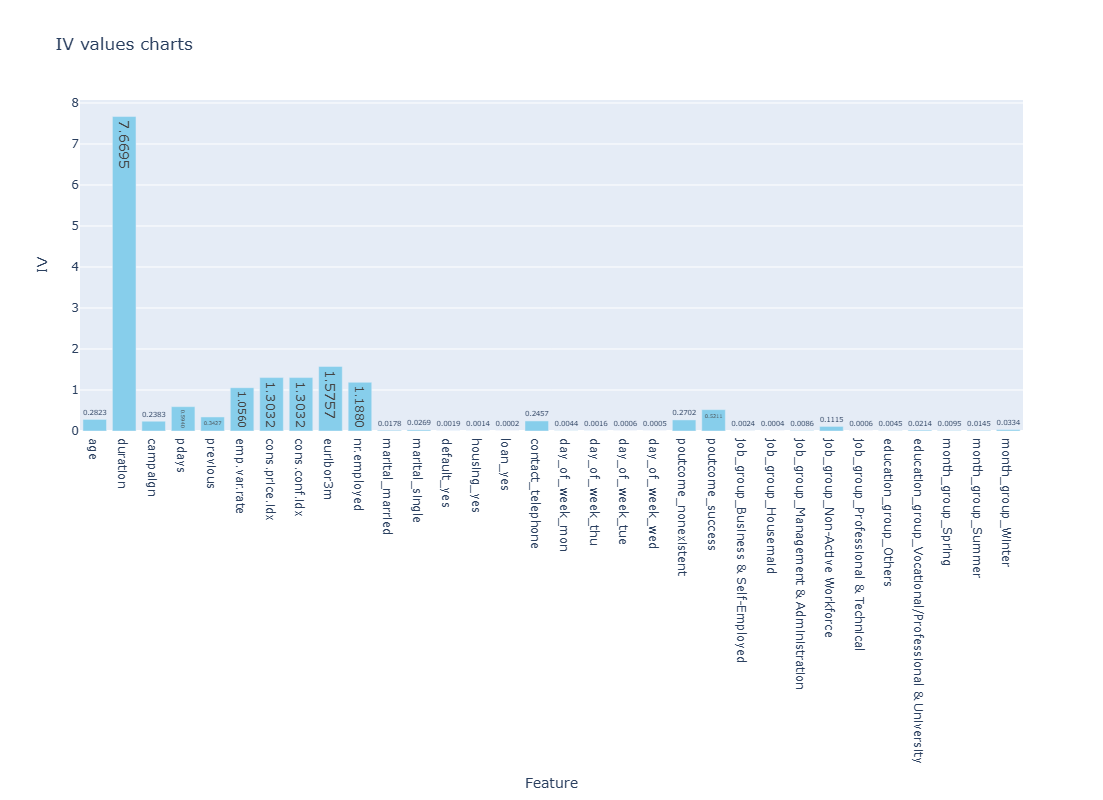

In [73]:
import plotly.express as px  # Import Plotly Express for simpler charts
import plotly.graph_objects as go

final_df['Feature'] = pd.Categorical(final_df['Feature'])

bar_chart = go.Bar(
    x=final_df['Feature'],
    y=final_df['IV'],
    text=final_df['IV'].apply(lambda x: f"{x:.4f}"),
    textfont_size=14,
    marker_color='skyblue',
)
layout = go.Layout(
    title='IV values charts',  
    xaxis_title='Feature',
    yaxis_title='IV'
)

fig = go.Figure(data=[bar_chart], layout=layout)
fig.update_layout(width=800, height=800) 
fig.show()

In [84]:
combined_df=combined_df.drop(columns=['day_of_week_mon', 'day_of_week_thu',
                            'day_of_week_tue', 'day_of_week_wed','month_group_Spring', 
                                      'month_group_Summer', 'month_group_Winter'])
##dropping cols in feature selection

In [85]:
combined_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'marital_married', 'marital_single', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'job_group_Business & Self-Employed',
       'job_group_Housemaid', 'job_group_Management & Administration',
       'job_group_Non-Active Workforce', 'job_group_Professional & Technical',
       'education_group_Others',
       'education_group_Vocational/Professional & University'],
      dtype='object')